In [17]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import xlwt
from xlwt import Workbook
import scipy.stats as st
import statistics as stat 

In [18]:
chr_list = ['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr20',
 'chr21',
 'chr22',
 'chr23',
 'chr24',
 'chr25',
 'chr26',
 'chr27',
 'chr28',
 'chr29',
 'chr30',
 'chr31',
 'chr32',
 'chr33',
 'chr34',
 'chr35',
 'chr36',
 'chr37',
 'chr38',
 'chrX']

In [19]:
chr_xticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,"X"]

In [20]:
mischka_chrom_sizes = {}
f = open("UU_Cfam_GSD_1.0.sorted.chrom.sizes", 'rt')
inFile = f.readlines()
total_un = 0
total_plusun = 0
total_auto = 0
for line in inFile:
    line = line.rstrip().split()
    if "_" not in line[0]:
        mischka_chrom_sizes[line[0]] = int(line[1])
        total_auto += int(line[1])
        total_plusun += (int(line[1]))
    else:
        total_un += int(line[1])
        mischka_chrom_sizes["unplaced"] = total_un
        total_plusun += (int(line[1]))
f.close()
mischka_chrom_sizes["total_+un"] = total_plusun
mischka_chrom_sizes["total_auto"] = total_auto
mischka_chrom_sizes

{'chr1': 123556469,
 'chr10': 70643054,
 'chr11': 74805798,
 'chr12': 72970719,
 'chr13': 64299765,
 'chr14': 61112200,
 'chr15': 64676183,
 'chr16': 60362399,
 'chr17': 65088165,
 'chr18': 56472973,
 'chr19': 55516201,
 'chr2': 84979418,
 'chr20': 58627490,
 'chr21': 51742555,
 'chr22': 61573679,
 'chr23': 53134997,
 'chr24': 48566227,
 'chr25': 51730745,
 'chr26': 39257614,
 'chr27': 46662488,
 'chr28': 41733330,
 'chr29': 42517134,
 'chr3': 92479059,
 'chr30': 40643782,
 'chr31': 39901454,
 'chr32': 40225481,
 'chr33': 32139216,
 'chr34': 42397973,
 'chr35': 28051305,
 'chr36': 31223415,
 'chr37': 30785915,
 'chr38': 24803098,
 'chr4': 89535178,
 'chr5': 89562946,
 'chr6': 78113029,
 'chr7': 81081596,
 'chr8': 76405709,
 'chr9': 61171909,
 'chrM': 16728,
 'unplaced': 135169260,
 'chrX': 124992030,
 'total_+un': 2488728686,
 'total_auto': 2353559426}

In [21]:
duplicated_total = 0
duplicated_auto = 0
mischka_auto_merged = []
f = open("mischka.all_biser.10kb_95same.merged.bed", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    if int(line[1]) < 1000000 and line[0] != "chrX":
        continue
    size = (int(line[2]) - int(line[1]))
    mischka_auto_merged.append((line[0], line[1], line[2], size))
    duplicated_auto += size
    duplicated_total += size
f.close()
duplicated_mbp = duplicated_auto / 1000000
percent_mbp = round(duplicated_auto / mischka_chrom_sizes['total_auto'] * 100, 4)
print("There are a total of {} duplicated autosomal segments, occupying {} mBP ({}%).".format(str(len(mischka_auto_merged)), str(duplicated_mbp), str(percent_mbp)))

There are a total of 1275 duplicated autosomal segments, occupying 59.985712 mBP (2.5487%).


In [22]:
mischka_auto_merged

[('chr1', '4654086', '4671963', 17877),
 ('chr1', '5826885', '5872807', 45922),
 ('chr1', '5873260', '5919147', 45887),
 ('chr1', '10511925', '10554981', 43056),
 ('chr1', '10555081', '10617653', 62572),
 ('chr1', '12355555', '12402413', 46858),
 ('chr1', '24580909', '24608666', 27757),
 ('chr1', '25713220', '25839663', 126443),
 ('chr1', '25849203', '25902210', 53007),
 ('chr1', '25904453', '25930301', 25848),
 ('chr1', '25931146', '26006540', 75394),
 ('chr1', '35855778', '35905360', 49582),
 ('chr1', '36757400', '36791305', 33905),
 ('chr1', '40869082', '40947052', 77970),
 ('chr1', '40947153', '41087822', 140669),
 ('chr1', '44419372', '44441925', 22553),
 ('chr1', '44460594', '44545483', 84889),
 ('chr1', '49472748', '49521378', 48630),
 ('chr1', '49521639', '49570683', 49044),
 ('chr1', '51154266', '51212375', 58109),
 ('chr1', '54583663', '54650640', 66977),
 ('chr1', '58208729', '58224335', 15606),
 ('chr1', '65854494', '65913289', 58795),
 ('chr1', '68336994', '68368921', 3192

In [23]:
f = open("mischka.biser.10kb_95h_no1auto.bed", 'w')
for item in mischka_auto_merged:
    f.write('\t'.join(item[0:3]) + '\n')
f.close()

In [24]:
mischka_biser_chro_duplicated = dict.fromkeys(chr_list, 0)
for item in mischka_auto_merged:
    chro = item[0]
    mischka_biser_chro_duplicated[chro] += item[3]
mischka_biser_chro_duplicated

{'chr1': 3299345,
 'chr2': 3718286,
 'chr3': 1548311,
 'chr4': 1494352,
 'chr5': 1198152,
 'chr6': 1552296,
 'chr7': 818870,
 'chr8': 3160153,
 'chr9': 1271690,
 'chr10': 1369635,
 'chr11': 2598519,
 'chr12': 893669,
 'chr13': 1827153,
 'chr14': 1143530,
 'chr15': 1318431,
 'chr16': 3135411,
 'chr17': 2069552,
 'chr18': 2148970,
 'chr19': 1724723,
 'chr20': 1072218,
 'chr21': 2128247,
 'chr22': 659598,
 'chr23': 903150,
 'chr24': 1065666,
 'chr25': 866595,
 'chr26': 3080944,
 'chr27': 1069429,
 'chr28': 871387,
 'chr29': 934849,
 'chr30': 281058,
 'chr31': 738499,
 'chr32': 1085592,
 'chr33': 1049827,
 'chr34': 665496,
 'chr35': 521123,
 'chr36': 490369,
 'chr37': 254586,
 'chr38': 541471,
 'chrX': 5414560}

In [25]:
mischka_fastcn_chro_duplicated = {}
mischka_fastcn_dups = []
f = open("mischka.fastcn_sds.10kb_assembled_skip1mbauto.bed", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    chro = line[0]
    if int(line[1]) < 1000000 and chro != "chrX":
        continue
    if chro not in mischka_fastcn_chro_duplicated.keys():
        mischka_fastcn_chro_duplicated[chro] = 0
    mischka_fastcn_chro_duplicated[chro] += (int(line[2]) - int(line[1]))
    mischka_fastcn_dups.append((chro, line[1], line[2], (int(line[2]) - int(line[1]))))
mischka_fastcn_chro_duplicated

{'chr1': 2499541,
 'chr10': 1287915,
 'chr11': 2576439,
 'chr12': 423140,
 'chr13': 865435,
 'chr14': 1132312,
 'chr15': 930166,
 'chr16': 2704124,
 'chr17': 1767702,
 'chr18': 2818813,
 'chr19': 1393858,
 'chr2': 2882075,
 'chr20': 1162208,
 'chr21': 2059170,
 'chr22': 293613,
 'chr23': 455229,
 'chr24': 677865,
 'chr25': 1019375,
 'chr26': 3356375,
 'chr27': 1308216,
 'chr28': 332303,
 'chr29': 254864,
 'chr3': 808189,
 'chr30': 192370,
 'chr31': 363075,
 'chr32': 381898,
 'chr33': 242035,
 'chr34': 637761,
 'chr35': 388822,
 'chr36': 130141,
 'chr37': 158452,
 'chr38': 288960,
 'chr4': 691341,
 'chr5': 790777,
 'chr6': 1491916,
 'chr7': 688664,
 'chr8': 3593393,
 'chr9': 1147409,
 'chrX': 5992404}

In [26]:
mischka_fastcn_dups

[('chr1', '4599957', '4615223', 15266),
 ('chr1', '4636104', '4654924', 18820),
 ('chr1', '5734457', '5747619', 13162),
 ('chr1', '12356824', '12381126', 24302),
 ('chr1', '13466133', '13477550', 11417),
 ('chr1', '25521320', '25534458', 13138),
 ('chr1', '25848051', '25870223', 22172),
 ('chr1', '25879594', '25992555', 112961),
 ('chr1', '36274717', '36289552', 14835),
 ('chr1', '37484025', '37498264', 14239),
 ('chr1', '38004274', '38027275', 23001),
 ('chr1', '41033318', '41047118', 13800),
 ('chr1', '44492830', '44519583', 26753),
 ('chr1', '44523345', '44546287', 22942),
 ('chr1', '51930758', '51948625', 17867),
 ('chr1', '54634512', '54650866', 16354),
 ('chr1', '56085833', '56097924', 12091),
 ('chr1', '60105689', '60133007', 27318),
 ('chr1', '60135643', '60162569', 26926),
 ('chr1', '64333685', '64351689', 18004),
 ('chr1', '70331029', '70364069', 33040),
 ('chr1', '70978921', '71021696', 42775),
 ('chr1', '71913815', '71929527', 15712),
 ('chr1', '72754859', '72780305', 25446

In [27]:
len(mischka_fastcn_dups)

974

In [28]:
f = open("mischka.fastCN.10kb_no1auto.bed", 'w')
for item in mischka_fastcn_dups:
    f.write('\t'.join(item[0:3]) + '\n')
f.close()

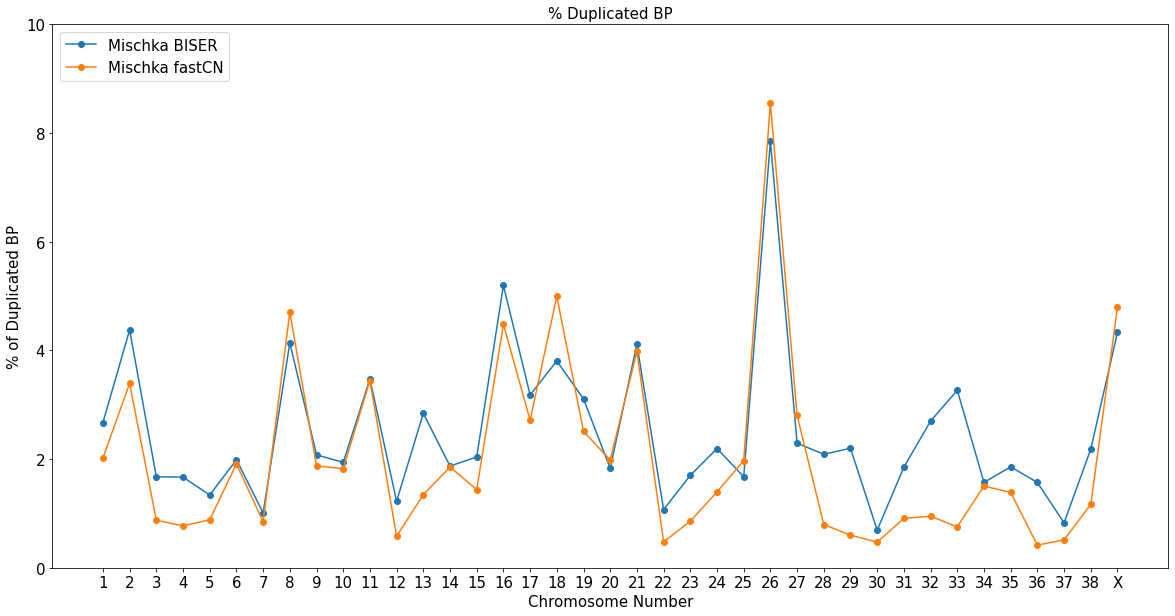

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.set_ylim(top = 10)

# get total duplicated BP 
sample_scatter = []
for chro in chr_list:
    sample_scatter.append(mischka_biser_chro_duplicated[chro] / mischka_chrom_sizes[chro] * 100)
    
sample_fastcn_scatter = []
for chro in chr_list:
    sample_fastcn_scatter.append(mischka_fastcn_chro_duplicated[chro] / mischka_chrom_sizes[chro] * 100)

# create plot
chr_count = []
for i in range(len(chr_list)):
    chr_count.append(i + 1)
# x = chromosomes, y = 
ax.plot(chr_count, sample_scatter, label = "Mischka BISER", marker = 'o')
ax.plot(chr_count, sample_fastcn_scatter, label = "Mischka fastCN", marker = 'o')
ax.legend(loc = 'upper left', prop={'size': 15})

# set labels for chro
plt.xticks(np.arange(min(chr_count), max(chr_count)+1, 1.0), chr_xticks)
ax.set_title("% Duplicated BP")
ax.set_xlabel("Chromosome Number")
ax.set_ylabel("% of Duplicated BP")
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
     ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

In [9]:
# 1275 merged 10kb+, 95%, no1mb autosome biser dups on 1-38 + X, 1033 fastCN dups

In [10]:
# calculate union bp, separate bp

bedtools intersect -a mischka.biser.10kb_95h_no1auto.bed -b mischka.fastCN.10kb_no1auto.bed -wao > mischka.biser_fastCN_union.bed

In [30]:
no_1mb = 0
f = open("mischka.all_biser.10kb_95same.merged.bed", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    if int(line[1]) > 1000000:
        no_1mb += 1
f.close()
no_1mb

1273

In [31]:
total_union_bp = 0
biser_only_bp = 0
union_dups = []
f = open("mischka.biser_fastCN_union.bed", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    
    biser_dup = [line[0], line[1], line[2]]
    if int(line[1]) < 1000000: #ignore first mb of each chromosome 
        continue
    biser_size = int(biser_dup[2]) - int(biser_dup[1])
    
    if line[3] == ".":
        biser_only_bp += biser_size #unique biser dup
    else:
        if int(line[4]) < 1000000:
            continue
        elif int(line[5]) - int(line[4]) < 10000: #if fastCN dup is < 10kb 
            continue
        else:
            fastcn_dup = [line[3], line[4], line[5]]
            union_size = int(line[6])
            total_union_bp += union_size #base pairs in union
            combined_dup = [biser_dup, fastcn_dup, union_size]
            union_dups.append(combined_dup)
f.close()
total_union_bp, biser_only_bp

(28256816, 27891684)

In [32]:
total_biser_dup_count, biser_fastcn_supp = 0,0
overlap_bp = 0
total_bp = 0
dup_check = []
f = open("mischka.biser_fastCN_union.bed", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    dup = (line[0], line[1], line[2])
    if int(line[1]) < 1000000 or (line[3] != "." and int(line[4]) < 1000000) or (int(line[5]) - int(line[4]) < 10000):
        pass
    else:
        if dup not in dup_check:
            biser_fastcn_supp += 1
    if dup not in dup_check:
        total_biser_dup_count += 1
    overlap_bp += int(line[6])
    total_bp += int(line[2]) - int(line[1])
    dup_check.append(dup)
total_biser_dup_count, biser_fastcn_supp

(1275, 543)

In [33]:
overlap_bp, total_bp

(28256816, 69244217)

bedtools intersect -a mischka.fastCN.10kb_no1auto.bed -b mischka.biser.10kb_95h_no1auto.bed -wao > mischka.fastCN_to_biser_union.bed

In [34]:
total_union_bp_2 = 0
fastCN_only_bp = 0
union_dups_2 = []
f = open("mischka.fastCN_to_biser_union.bed", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    fastcn_dup = [line[0], line[1], line[2]]
    fastcn_size = int(line[2]) - int(line[1])
    if fastcn_size < 10000: #check for fastCN 10kb+
        continue
        
    if line[3] == ".":
        fastCN_only_bp += fastcn_size
    else:
        if int(line[5]) - int(line[4]) < 10000: #check for biser 10kb
            continue
        else:
            union_size = int(line[6])
            biser_dup = [line[3], line[4], line[5]]
            total_union_bp_2 += union_size
            combined_dup = [biser_dup, fastcn_dup, union_size]
            union_dups_2.append(combined_dup)
f.close()
total_union_bp_2, fastCN_only_bp

(28256816, 13014731)

In [35]:
total_fastcn_dup_count, fastcn_biser_supp = 0,0
overlap_bp = 0
total_bp = 0
dup_check = []
f = open("mischka.fastCN_to_biser_union.bed", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    dup = (line[0], line[1], line[2])
    if int(line[1]) < 1000000 or int(line[5]) < 1000000 or (int(line[2]) - int(line[1]) < 10000) or line[4] == ".":
        pass
    else:
        if dup not in dup_check:
            fastcn_biser_supp += 1
    if dup not in dup_check:
        total_fastcn_dup_count += 1
    overlap_bp += int(line[6])
    total_bp += int(line[2]) - int(line[1])
    dup_check.append(dup)
total_fastcn_dup_count, fastcn_biser_supp

(974, 440)

In [48]:
overlap_bp, total_bp

(28260537, 121946008)

In [36]:
total_union_bp_2, total_union_bp

(28256816, 28256816)

In [37]:
fastCN_only_bp

13014731

In [38]:
biser_only_bp

27891684

In [39]:
total_union_mb = total_union_bp / 1000000
biser_mb = biser_only_bp / 1000000
fastcn_mb = fastCN_only_bp / 1000000

In [40]:
# mb found in common b/t both sets, biser-specific, fastcn-specific
total_union_mb, biser_mb,  fastcn_mb

(28.256816, 27.891684, 13.014731)

In [41]:
total_bp = total_union_bp + biser_only_bp + fastCN_only_bp
total_bp

69163231

In [42]:
total_bp/1000000

69.163231

In [43]:
total_union_bp/total_bp, biser_only_bp/total_bp, fastCN_only_bp/total_bp

(0.4085525732596269, 0.403273294158279, 0.1881741325820941)

In [44]:
# checking fastCN cn of biser dups

bedtools intersect -a mischka.biser.10kb_95h_no1auto.bed -b GRSDSAMN13230619.depth.1kb.bed.CN.bed -F 1.0 -wo > mischka.biser_to_fastCN.cn.bed

In [44]:
biser_cn_lists = {}
f = open("mischka.biser_to_fastCN.cn.bed", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    biser_dup = (line[0], line[1], line[2])
    if biser_dup not in biser_cn_lists.keys():
        biser_cn_lists[biser_dup] = []
    biser_cn_lists[biser_dup].append(float(line[6]))
f.close()
biser_cn_lists

{('chr1', '4654086', '4671963'): [2.344538448324798,
  2.4221840226235227,
  2.091177503031831,
  3.730655038626654,
  3.85779417439954],
 ('chr1', '5826885', '5872807'): [2.513476537082142,
  1.7581056650201363,
  2.2178434103508513,
  1.813157201119601,
  1.6443395254998934,
  2.238323900568972,
  2.4706235752686205,
  2.1988741130483227,
  2.5387980534227594,
  2.2761529497641697,
  2.016178702742164,
  2.5239478821716452,
  2.353486028659774,
  2.3561617725585533],
 ('chr1', '5873260', '5919147'): [2.2311354130938272,
  2.8884242059987444,
  2.03647260886477,
  1.8664227322641216,
  1.8999884811731487,
  2.3720212599120796,
  2.4354933558554666,
  2.219365663912464,
  2.4371622915890137,
  2.443009643581132,
  2.400370177958239,
  1.8449585519170728,
  2.3957722931299483,
  2.1699413922411335],
 ('chr1', '10511925', '10554981'): [2.7705622192285957,
  2.619065129440506,
  1.2640803671684337,
  2.043312428765943,
  2.258748090812727,
  1.847603396743685,
  2.3214555552938654],
 ('ch

In [45]:
biser_cn = {}
for dup, cn_list in biser_cn_lists.items():
    biser_cn[dup] = stat.median(cn_list)
biser_cn

{('chr1', '4654086', '4671963'): 2.4221840226235227,
 ('chr1', '5826885', '5872807'): 2.257238425166571,
 ('chr1', '5873260', '5919147'): 2.3015783365029536,
 ('chr1', '10511925', '10554981'): 2.258748090812727,
 ('chr1', '10555081', '10617653'): 2.317833836782966,
 ('chr1', '12355555', '12402413'): 2.5769275406307925,
 ('chr1', '24580909', '24608666'): 2.487721951435565,
 ('chr1', '25713220', '25839663'): 2.1253330673205095,
 ('chr1', '25849203', '25902210'): 4.21575222480956,
 ('chr1', '25904453', '25930301'): 3.7153672484143128,
 ('chr1', '25931146', '26006540'): 4.313123062628577,
 ('chr1', '35855778', '35905360'): 2.1558757069549355,
 ('chr1', '36757400', '36791305'): 2.328916089646858,
 ('chr1', '40869082', '40947052'): 2.2207864103244055,
 ('chr1', '40947153', '41087822'): 2.3119553606473953,
 ('chr1', '44419372', '44441925'): 2.0956849735095116,
 ('chr1', '44460594', '44545483'): 2.4974736150137984,
 ('chr1', '49472748', '49521378'): 1.9895879451176532,
 ('chr1', '49521639', '4

In [46]:
len(biser_cn)

1211

In [47]:
duplicated_biser = {}
nondup_biser = {}
duplicated_biser_sizes = {}
nondup_biser_sizes = {}
for dup, value in biser_cn.items():
    if value >= 2.5:
        size = int(dup[2]) - int(dup[1])
        duplicated_biser[dup] = value
        duplicated_biser_sizes[dup] = size
    else:
        size = int(dup[2]) - int(dup[1])
        nondup_biser[dup] = value
        nondup_biser_sizes[dup] = size
duplicated_biser

{('chr1', '12355555', '12402413'): 2.5769275406307925,
 ('chr1', '25849203', '25902210'): 4.21575222480956,
 ('chr1', '25904453', '25930301'): 3.7153672484143128,
 ('chr1', '25931146', '26006540'): 4.313123062628577,
 ('chr1', '54583663', '54650640'): 2.5150299469402486,
 ('chr1', '65854494', '65913289'): 2.5272091490191357,
 ('chr1', '70297199', '70308196'): 4.101911120474791,
 ('chr1', '75571731', '75682655'): 2.9294630289466594,
 ('chr1', '75698903', '75799377'): 3.0044223131492354,
 ('chr1', '77944607', '77968980'): 3.5868455158123433,
 ('chr1', '77991869', '78014932'): 4.032123926178869,
 ('chr1', '79066003', '79094180'): 8.11750537739511,
 ('chr1', '79252855', '79265645'): 7.885825131025651,
 ('chr1', '79293196', '79316500'): 8.39104335250753,
 ('chr1', '93761491', '93782005'): 4.0660423778684835,
 ('chr1', '98069974', '98081582'): 2.848502685140625,
 ('chr1', '98417915', '98442664'): 4.741485340263171,
 ('chr1', '98470498', '98503565'): 4.6989197301748975,
 ('chr1', '100172316',

In [48]:
dict(sorted(duplicated_biser_sizes.items(), key=lambda item: item[1]))

{('chr1', '105895161', '105905167'): 10006,
 ('chr14', '6293803', '6303832'): 10029,
 ('chr21', '27559268', '27569313'): 10045,
 ('chr16', '10351514', '10361571'): 10057,
 ('chr16', '48488115', '48498174'): 10059,
 ('chr9', '47192510', '47202639'): 10129,
 ('chrX', '115784210', '115794342'): 10132,
 ('chr1', '105849338', '105859497'): 10159,
 ('chr1', '100172316', '100182505'): 10189,
 ('chr31', '35920215', '35930425'): 10210,
 ('chr31', '38280124', '38290342'): 10218,
 ('chr6', '7311237', '7321455'): 10218,
 ('chr13', '5196131', '5206387'): 10256,
 ('chr37', '25773661', '25783934'): 10273,
 ('chr19', '20607666', '20618011'): 10345,
 ('chr20', '8524443', '8534830'): 10387,
 ('chr20', '37432979', '37443369'): 10390,
 ('chr20', '54604892', '54615312'): 10420,
 ('chr20', '37386915', '37397414'): 10499,
 ('chr34', '12455969', '12466514'): 10545,
 ('chr9', '48815906', '48826507'): 10601,
 ('chr31', '32953657', '32964266'): 10609,
 ('chr1', '100202773', '100213444'): 10671,
 ('chr20', '54620

In [49]:
len(duplicated_biser)

575

In [ ]:
# exporting to files - biser considered fastcn dupd, and biser not considered fastcn-dups

In [65]:
nondup_biser

{('chr1', '4654086', '4671963'): 2.4221840226235227,
 ('chr1', '5826885', '5872807'): 2.257238425166571,
 ('chr1', '5873260', '5919147'): 2.3015783365029536,
 ('chr1', '10511925', '10554981'): 2.258748090812727,
 ('chr1', '10555081', '10617653'): 2.317833836782966,
 ('chr1', '24580909', '24608666'): 2.487721951435565,
 ('chr1', '25713220', '25839663'): 2.1253330673205095,
 ('chr1', '35855778', '35905360'): 2.1558757069549355,
 ('chr1', '36757400', '36791305'): 2.328916089646858,
 ('chr1', '40869082', '40947052'): 2.2207864103244055,
 ('chr1', '40947153', '41087822'): 2.3119553606473953,
 ('chr1', '44419372', '44441925'): 2.0956849735095116,
 ('chr1', '44460594', '44545483'): 2.4974736150137984,
 ('chr1', '49472748', '49521378'): 1.9895879451176532,
 ('chr1', '49521639', '49570683'): 1.9272768633229702,
 ('chr1', '51154266', '51212375'): 2.047926647338938,
 ('chr1', '58208729', '58224335'): 1.8644684382938537,
 ('chr1', '68336994', '68368921'): 2.0593374399732873,
 ('chr1', '76615612', 

In [66]:
f = open("mischka.biser_not_fastcn_duplicated.bed", 'w')
for coords, cn in nondup_biser.items():
    f.write("\t".join(coords) + '\t' + str(cn) + '\t' + "{}:{}-{}".format(coords[0], coords[1], coords[2]) + '\n')
f.close()

In [67]:
f = open("mischka.biser_supported_fastcn_duplicated.bed", 'w')
for coords, cn in duplicated_biser.items():
    f.write("\t".join(coords) + '\t' + str(cn) + '\t' + "{}:{}-{}".format(coords[0], coords[1], coords[2]) + '\n')
f.close()

In [ ]:
# create graph for biser support 

In [74]:
mischka_chrom_sizes = {}
f = open("mischka.sorted.chrom.sizes", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    if "chrUn" not in line[0]:
        mischka_chrom_sizes[line[0]] = int(line[1])
f.close()
mischka_chrom_sizes

{'chr1': 123556469,
 'chr10': 70643054,
 'chr11': 74805798,
 'chr12': 72970719,
 'chr13': 64299765,
 'chr14': 61112200,
 'chr15': 64676183,
 'chr16': 60362399,
 'chr17': 65088165,
 'chr18': 56472973,
 'chr19': 55516201,
 'chr2': 84979418,
 'chr20': 58627490,
 'chr21': 51742555,
 'chr22': 61573679,
 'chr23': 53134997,
 'chr24': 48566227,
 'chr25': 51730745,
 'chr26': 39257614,
 'chr27': 46662488,
 'chr28': 41733330,
 'chr29': 42517134,
 'chr3': 92479059,
 'chr30': 40643782,
 'chr31': 39901454,
 'chr32': 40225481,
 'chr33': 32139216,
 'chr34': 42397973,
 'chr35': 28051305,
 'chr36': 31223415,
 'chr37': 30785915,
 'chr38': 24803098,
 'chr4': 89535178,
 'chr5': 89562946,
 'chr6': 78113029,
 'chr7': 81081596,
 'chr8': 76405709,
 'chr9': 61171909,
 'chrM': 16728,
 'chrX': 124992030,
 'chrY_NC_051844.1': 3937623,
 'chrY_unplaced_NW_024010443.1': 1569522,
 'chrY_unplaced_NW_024010444.1': 1221461}

In [90]:
duplicated_biser

{('chr1', '12355555', '12402413'): 2.5769275406307925,
 ('chr1', '25849203', '25902210'): 4.21575222480956,
 ('chr1', '25904453', '25930301'): 3.7153672484143128,
 ('chr1', '25931146', '26006540'): 4.313123062628577,
 ('chr1', '54583663', '54650640'): 2.5150299469402486,
 ('chr1', '65854494', '65913289'): 2.5272091490191357,
 ('chr1', '70297199', '70308196'): 4.101911120474791,
 ('chr1', '75571731', '75682655'): 2.9294630289466594,
 ('chr1', '75698903', '75799377'): 3.0044223131492354,
 ('chr1', '77944607', '77968980'): 3.5868455158123433,
 ('chr1', '77991869', '78014932'): 4.032123926178869,
 ('chr1', '79066003', '79094180'): 8.11750537739511,
 ('chr1', '79252855', '79265645'): 7.885825131025651,
 ('chr1', '79293196', '79316500'): 8.39104335250753,
 ('chr1', '93761491', '93782005'): 4.0660423778684835,
 ('chr1', '98069974', '98081582'): 2.848502685140625,
 ('chr1', '98417915', '98442664'): 4.741485340263171,
 ('chr1', '98470498', '98503565'): 4.6989197301748975,
 ('chr1', '100172316',

In [84]:
mischka_biser_chro_fastCNdup_yes = {}
for dup in duplicated_biser.keys():
    chro = dup[0]
    if chro not in mischka_biser_chro_fastCNdup_yes.keys():
        mischka_biser_chro_fastCNdup_yes[chro] = 0
    mischka_biser_chro_fastCNdup_yes[chro] += (int(dup[2]) - int(dup[1]))
mischka_biser_chro_fastCNdup_yes

{'chr1': 1751539,
 'chr10': 973087,
 'chr11': 1876124,
 'chr12': 92024,
 'chr13': 796431,
 'chr14': 506088,
 'chr15': 579029,
 'chr16': 2227889,
 'chr17': 1431631,
 'chr18': 1699843,
 'chr19': 1047932,
 'chr2': 2403321,
 'chr20': 357013,
 'chr21': 1173354,
 'chr23': 282605,
 'chr24': 249602,
 'chr25': 568121,
 'chr26': 2518239,
 'chr27': 578127,
 'chr28': 165358,
 'chr29': 119204,
 'chr3': 466099,
 'chr30': 81812,
 'chr31': 155590,
 'chr32': 303792,
 'chr33': 25255,
 'chr34': 325753,
 'chr35': 247331,
 'chr36': 83227,
 'chr37': 40308,
 'chr38': 74541,
 'chr4': 126547,
 'chr5': 295861,
 'chr6': 951449,
 'chr7': 302591,
 'chr8': 2364995,
 'chr9': 788175,
 'chrX': 3309522}

In [85]:
mischka_biser_chro_fastCNdup_no = {}
for dup in nondup_biser.keys():
    chro = dup[0]
    if chro not in mischka_biser_chro_fastCNdup_no.keys():
        mischka_biser_chro_fastCNdup_no[chro] = 0
    mischka_biser_chro_fastCNdup_no[chro] += (int(dup[2]) - int(dup[1]))
mischka_biser_chro_fastCNdup_no

{'chr1': 1469291,
 'chr10': 370970,
 'chr11': 684526,
 'chr12': 801645,
 'chr13': 1018053,
 'chr14': 589715,
 'chr15': 739402,
 'chr16': 744632,
 'chr17': 637921,
 'chr18': 350929,
 'chr19': 663255,
 'chr2': 1196699,
 'chr20': 715205,
 'chr21': 954893,
 'chr22': 659598,
 'chr23': 608752,
 'chr24': 801705,
 'chr25': 286718,
 'chr26': 562705,
 'chr27': 479387,
 'chr28': 706029,
 'chr29': 815645,
 'chr3': 1082212,
 'chr30': 199246,
 'chr31': 562733,
 'chr32': 768210,
 'chr33': 1001969,
 'chr34': 289588,
 'chr35': 273792,
 'chr36': 407142,
 'chr37': 214278,
 'chr38': 466930,
 'chr4': 1285292,
 'chr5': 902291,
 'chr6': 590068,
 'chr7': 505631,
 'chr8': 745979,
 'chr9': 483515,
 'chrX': 1744181}

In [133]:
mischka_biser_chro_duplicated = {}
for chro in chr_list:
    try:
        yes = mischka_biser_chro_fastCNdup_yes[chro]
    except:
        yes = 0
    try:
        no = mischka_biser_chro_fastCNdup_no[chro]
    except:
        no = 0
    mischka_biser_chro_duplicated[chro] = yes + no

In [134]:
for chro in chr_list:
    print(mischka_biser_chro_duplicated[chro], mischka_biser_chro_fastCNdup_yes[chro] + mischka_biser_chro_fastCNdup_no[chro])

3220830 3220830
3600020 3600020
1548311 1548311
1411839 1411839
1198152 1198152
1541517 1541517
808222 808222
3110974 3110974
1271690 1271690
1344057 1344057
2560650 2560650
893669 893669
1814484 1814484
1095803 1095803
1318431 1318431
2972521 2972521
2069552 2069552
2050772 2050772
1711187 1711187
1072218 1072218
2128247 2128247


KeyError: 'chr22'

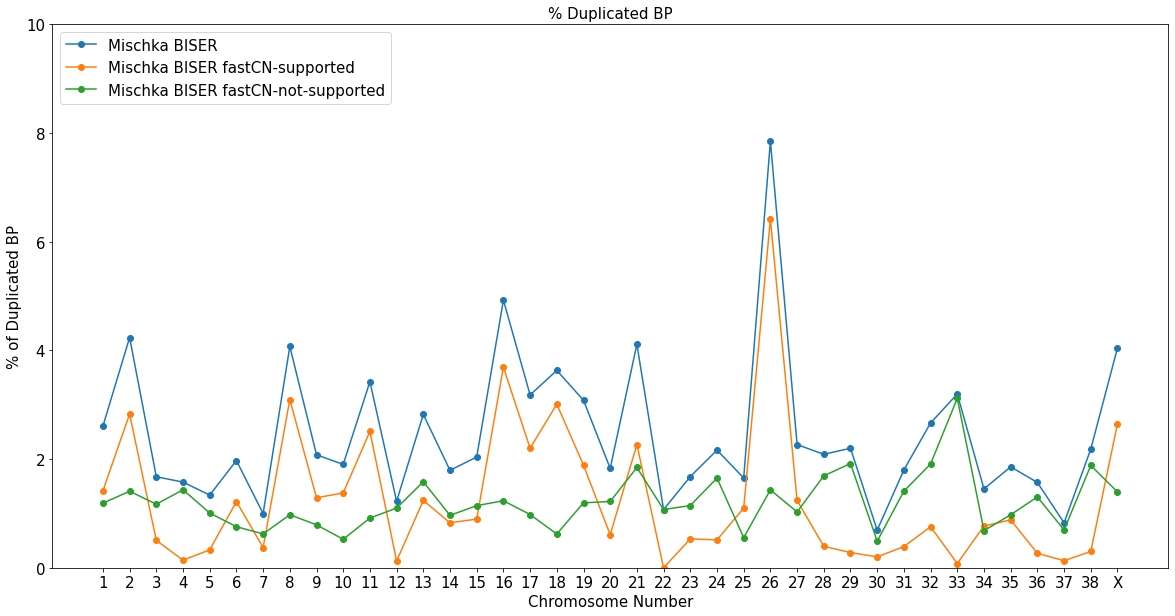

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.set_ylim(top = 10)

# get total duplicated BP 
sample_scatter = []
for chro in chr_list:
    sample_scatter.append(mischka_biser_chro_duplicated[chro] / mischka_chrom_sizes[chro] * 100)
    
sample_fastcn_scatter = []
for chro in chr_list:
    sample_fastcn_scatter.append(mischka_fastcn_chro_duplicated[chro] / mischka_chrom_sizes[chro] * 100)

sample_biser_fastcn_supported = []
for chro in chr_list:
    if chro in mischka_biser_chro_fastCNdup_yes.keys():
        sample_biser_fastcn_supported.append(mischka_biser_chro_fastCNdup_yes[chro] / mischka_chrom_sizes[chro] * 100)
    else:
        sample_biser_fastcn_supported.append(0)
        
sample_biser_fastcn_not_supported = []
for chro in chr_list:
    if chro in mischka_biser_chro_fastCNdup_no.keys():
        sample_biser_fastcn_not_supported.append(mischka_biser_chro_fastCNdup_no[chro] / mischka_chrom_sizes[chro] * 100)
    else:
        sample_biser_fastcn_not_supported.append(0)
        
#sample_biser_fastcn_missing = []
#for chro in chr_list:
#    if chro in mischka_biser_chro_fastCNdup_na.keys():
#        sample_biser_fastcn_missing.append(mischka_biser_chro_fastCNdup_na[chro] / mischka_chrom_sizes[chro] * 100)
#    else:
#        sample_biser_fastcn_missing.append(0)
    
# create plot
chr_count = []
for i in range(len(chr_list)):
    chr_count.append(i + 1)
# x = chromosomes, y = 
ax.plot(chr_count, sample_scatter, label = "Mischka BISER", marker = 'o')
#ax.plot(chr_count, sample_fastcn_scatter, label = "Mischka fastCN", marker = 'o')
ax.plot(chr_count, sample_biser_fastcn_supported, label = "Mischka BISER fastCN-supported", marker = 'o')
ax.plot(chr_count, sample_biser_fastcn_not_supported, label = "Mischka BISER fastCN-not-supported", marker = 'o')
#ax.plot(chr_count, sample_biser_fastcn_missing, label = "Mischka BISER fastCN-NA", marker = 'o')
ax.legend(loc = 'upper left', prop={'size': 15})

# set labels for chro
plt.xticks(np.arange(min(chr_count), max(chr_count)+1, 1.0), chr_xticks)
ax.set_title("% Duplicated BP")
ax.set_xlabel("Chromosome Number")
ax.set_ylabel("% of Duplicated BP")
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
     ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

In [ ]:
# intersecting fastCN dups with BISER dups 

In [121]:
f = open("mischka.fastCN_to_biser_union.bed", 'rt')
fastcn_supported = []
fastcn_not_supported = []
fastcn_total_size_by_chro = {}
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    chro = line[0]
    dup = (line[0], line[1], line[2])
    size = int(line[2]) - int(line[1])
    if chro not in fastcn_total_size_by_chro.keys():
        fastcn_total_size_by_chro[chro] = 0
    if line[3] == ".":
        if dup not in fastcn_not_supported:
            fastcn_not_supported.append(dup)
            fastcn_total_size_by_chro[chro] += size
    else:
        if dup not in fastcn_supported:
            fastcn_supported.append(dup)
            fastcn_total_size_by_chro[chro] += size
f.close()
fastcn_supported

[('chr1', '4636104', '4654924'),
 ('chr1', '12356824', '12381126'),
 ('chr1', '25848051', '25870223'),
 ('chr1', '25879594', '25992555'),
 ('chr1', '41033318', '41047118'),
 ('chr1', '44492830', '44519583'),
 ('chr1', '44523345', '44546287'),
 ('chr1', '54634512', '54650866'),
 ('chr1', '75603639', '75615529'),
 ('chr1', '75635302', '75652662'),
 ('chr1', '75656007', '75715222'),
 ('chr1', '75717369', '75741221'),
 ('chr1', '75746990', '75781279'),
 ('chr1', '77929074', '77977901'),
 ('chr1', '77988316', '78017905'),
 ('chr1', '79063423', '79093070'),
 ('chr1', '79248910', '79280213'),
 ('chr1', '79292619', '79318043'),
 ('chr1', '93760198', '93770250'),
 ('chr1', '98393349', '98447008'),
 ('chr1', '98470283', '98535047'),
 ('chr1', '100169214', '100182364'),
 ('chr1', '100202651', '100221472'),
 ('chr1', '101160019', '101183203'),
 ('chr1', '101208245', '101237361'),
 ('chr1', '103535826', '103547993'),
 ('chr1', '104663162', '105195004'),
 ('chr1', '106624691', '106697042'),
 ('chr1'

In [122]:
fastcn_not_supported

[('chr1', '4599957', '4615223'),
 ('chr1', '5734457', '5747619'),
 ('chr1', '13466133', '13477550'),
 ('chr1', '25521320', '25534458'),
 ('chr1', '36274717', '36289552'),
 ('chr1', '37484025', '37498264'),
 ('chr1', '38004274', '38027275'),
 ('chr1', '51930758', '51948625'),
 ('chr1', '56085833', '56097924'),
 ('chr1', '60105689', '60133007'),
 ('chr1', '60135643', '60162569'),
 ('chr1', '64333685', '64351689'),
 ('chr1', '70331029', '70364069'),
 ('chr1', '70978921', '71021696'),
 ('chr1', '71913815', '71929527'),
 ('chr1', '72754859', '72780305'),
 ('chr1', '72808209', '72836205'),
 ('chr1', '96031403', '96061966'),
 ('chr1', '100027559', '100074883'),
 ('chr1', '100820904', '100834099'),
 ('chr1', '100844624', '100865894'),
 ('chr1', '101361458', '101381084'),
 ('chr1', '101570234', '101588722'),
 ('chr1', '102013375', '102042647'),
 ('chr1', '102048609', '102081525'),
 ('chr1', '104531211', '104552798'),
 ('chr1', '105647513', '105681510'),
 ('chr1', '105692487', '105730453'),
 ('c

In [114]:
len(fastcn_supported)

441

In [115]:
len(fastcn_not_supported)

535

In [126]:
mischka_fastcn_chro_bisersupp_yes = {}
for dup in fastcn_supported:
    chro = dup[0]
    size = int(dup[2]) - int(dup[1])
    if chro not in mischka_fastcn_chro_bisersupp_yes.keys():
        mischka_fastcn_chro_bisersupp_yes[chro] = 0
    mischka_fastcn_chro_bisersupp_yes[chro] += size
mischka_fastcn_chro_bisersupp_yes

{'chr1': 1710185,
 'chr2': 2658564,
 'chr3': 557410,
 'chr4': 125974,
 'chr5': 333954,
 'chr6': 1117146,
 'chr7': 279854,
 'chr8': 3204042,
 'chr9': 822514,
 'chr10': 1081479,
 'chr11': 2255006,
 'chr12': 138389,
 'chr13': 756387,
 'chr14': 833728,
 'chr15': 556127,
 'chr16': 2441924,
 'chr17': 1449071,
 'chr18': 2077622,
 'chr19': 953908,
 'chr20': 666432,
 'chr21': 1631906,
 'chr22': 31946,
 'chr23': 251370,
 'chr24': 324121,
 'chr25': 640679,
 'chr26': 3199445,
 'chr27': 599912,
 'chr28': 134023,
 'chr29': 152647,
 'chr30': 37004,
 'chr31': 120542,
 'chr32': 318965,
 'chr33': 32605,
 'chr34': 545283,
 'chr35': 270482,
 'chr37': 43225,
 'chr38': 136098,
 'chrX': 4693645}

In [127]:
mischka_fastcn_chro_bisersupp_no = {}
for dup in fastcn_not_supported:
    chro = dup[0]
    if chro not in mischka_fastcn_chro_bisersupp_no.keys():
        mischka_fastcn_chro_bisersupp_no[chro] = 0
    size = int(dup[2]) - int(dup[1])
    mischka_fastcn_chro_bisersupp_no[chro] += size
mischka_fastcn_chro_bisersupp_no

{'chr1': 799356,
 'chr2': 223511,
 'chr3': 250779,
 'chr4': 565367,
 'chr5': 456823,
 'chr6': 374770,
 'chr7': 408810,
 'chr8': 389351,
 'chr9': 324895,
 'chr10': 206436,
 'chr11': 321433,
 'chr12': 284751,
 'chr13': 109048,
 'chr14': 298584,
 'chr15': 374039,
 'chr16': 262200,
 'chr17': 328631,
 'chr18': 741191,
 'chr19': 439950,
 'chr20': 495776,
 'chr21': 427264,
 'chr22': 261667,
 'chr23': 203859,
 'chr24': 353744,
 'chr25': 378696,
 'chr26': 156930,
 'chr27': 708304,
 'chr28': 198280,
 'chr29': 102217,
 'chr30': 155366,
 'chr31': 242533,
 'chr32': 62933,
 'chr33': 209430,
 'chr34': 92478,
 'chr35': 118340,
 'chr36': 130141,
 'chr37': 115227,
 'chr38': 152862,
 'chrX': 1298759}

In [128]:
for chro in chr_list:
    print(mischka_fastcn_chro_duplicated[chro], mischka_fastcn_chro_bisersupp_yes[chro] + mischka_fastcn_chro_bisersupp_no[chro])

2509541 2509541
2882075 2882075
808189 808189
691341 691341
790777 790777
1491916 1491916
688664 688664
3593393 3593393
1147409 1147409
1287915 1287915
2576439 2576439
423140 423140
865435 865435
1132312 1132312
930166 930166
2704124 2704124
1777702 1777702
2818813 2818813
1393858 1393858
1162208 1162208
2059170 2059170
293613 293613
455229 455229
677865 677865
1019375 1019375
3356375 3356375
1308216 1308216
332303 332303
254864 254864
192370 192370
363075 363075
381898 381898
242035 242035
637761 637761
388822 388822


KeyError: 'chr36'

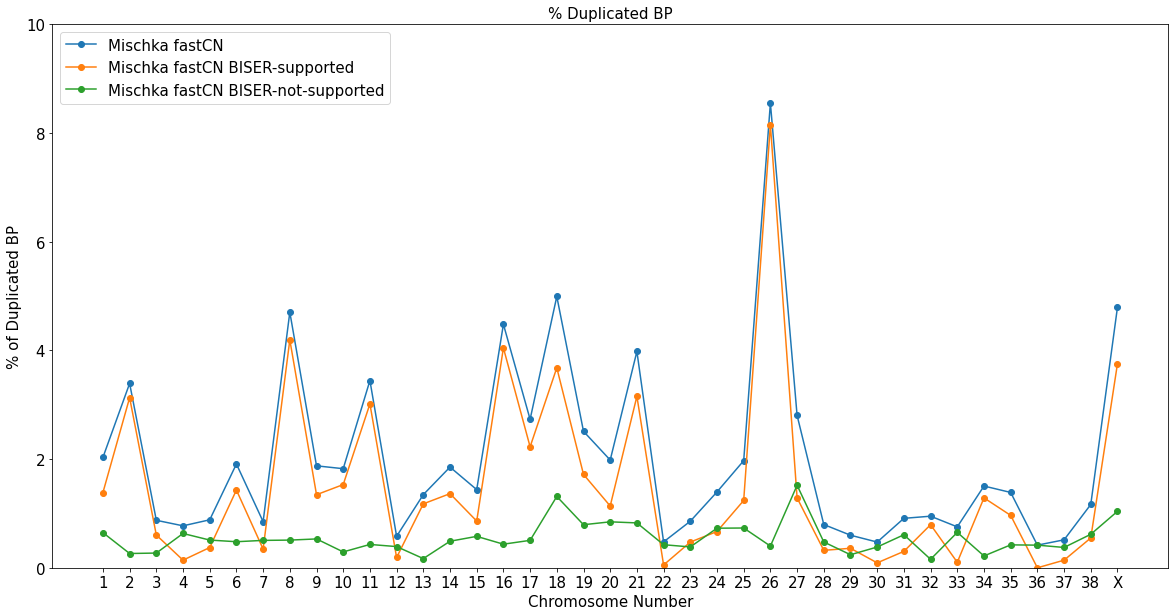

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.set_ylim(top = 10)

# get total duplicated BP     
sample_fastcn_scatter = []
for chro in chr_list:
    sample_fastcn_scatter.append(mischka_fastcn_chro_duplicated[chro] / mischka_chrom_sizes[chro] * 100)
        
sample_fastcn_biser_supported = []
for chro in chr_list:
    if chro in mischka_fastcn_chro_bisersupp_yes.keys():
        sample_fastcn_biser_supported.append(mischka_fastcn_chro_bisersupp_yes[chro] / mischka_chrom_sizes[chro] * 100)
    else:
        sample_fastcn_biser_supported.append(0)
        
sample_fastcn_biser_not_supported = []
for chro in chr_list:
    if chro in mischka_fastcn_chro_bisersupp_no.keys():
        sample_fastcn_biser_not_supported.append(mischka_fastcn_chro_bisersupp_no[chro] / mischka_chrom_sizes[chro] * 100)
    else:
        sample_fastcn_biser_not_supported.append(0)
    
# create plot
chr_count = []
for i in range(len(chr_list)):
    chr_count.append(i + 1)
# x = chromosomes, y = 
#ax.plot(chr_count, sample_scatter, label = "Mischka BISER", marker = 'o')
ax.plot(chr_count, sample_fastcn_scatter, label = "Mischka fastCN", marker = 'o')
#ax.plot(chr_count, sample_biser_fastcn_supported, label = "Mischka BISER fastCN-supported", marker = 'o')
#ax.plot(chr_count, sample_biser_fastcn_not_supported, label = "Mischka BISER fastCN-not-supported", marker = 'o')
#ax.plot(chr_count, sample_biser_fastcn_missing, label = "Mischka BISER fastCN-NA", marker = 'o')
ax.plot(chr_count, sample_fastcn_biser_supported, label = "Mischka fastCN BISER-supported", marker = 'o')
ax.plot(chr_count, sample_fastcn_biser_not_supported, label = "Mischka fastCN BISER-not-supported", marker = 'o')
ax.legend(loc = 'upper left', prop={'size': 15})

# set labels for chro
plt.xticks(np.arange(min(chr_count), max(chr_count)+1, 1.0), chr_xticks)
ax.set_title("% Duplicated BP")
ax.set_xlabel("Chromosome Number")
ax.set_ylabel("% of Duplicated BP")
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
     ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)